# 평가

### 분류모델 평가

### 정확도 (Accuracy)
- 전체 샘플 중에서 올바르게 예측한 샘플의 비율
- 데이터가 불균형한 경우 정확도는 비현실적인 성능을 낼 수 있음 (데이터 편향시)
- 실제로 정확도만으로 이 모델이 정확한 모델인가를 평가할 수 없음

In [59]:
# 잘못된 학습 모델 만들어보기
from sklearn.base import BaseEstimator
import numpy as np
# BaseEstimator 클래스 상속 (fit, predict, score 메서드 구현...)

class MyTitanicClassifier(BaseEstimator):
    # 훈련 메서드
    def fit(self, X, y):                 # X : 특성 데이터, y : 라벨 데이터 → 모델 훈련 시 필요한 데이터
        pass                             # 컬럼 특성 X, y 그대로 저장 (잘못된 학습 모델 만들어보기)

    # 결과 예측 메서드
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1)) # 예측 결과를 우선 0(사망)으로 초기화
        for i in range(X.shape[0]):      # X.shape[0] : 샘플 수
            sex = X['Sex'].iloc[i]       # X의 0번째 행의 Sex 컬럼 값
            if sex == 0:           # 여성
                pred[i] = 1        # 생존으로 예측
        return pred

In [60]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

# 전처리 -> 함수로 만들기

def fillna(df):
    """
    결측치 처리 함수
    - Age : 평균치로 대체
    - Cabin : 'N' 기본값으로 대체
    - Embarked : 'N' 기본값으로 대체
    """
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')
    return df

def drop_feature(df):
    """
    모델 훈련과 관련 없는 속성 제거
    - PassengerId, Name, Ticket
    """
    return df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

def encode_feature(df):
    """
    범주형 데이터를 숫자로 인코딩
    - Sex, Cabin, Embarked
    """
    df['Cabin'] = df['Cabin'].str[:1]

    categories = ['Sex', 'Cabin', 'Embarked']

    for cate_item in categories:
        label_encoder = LabelEncoder()
        df[cate_item] = label_encoder.fit_transform(df[cate_item])
    
    return df


def scaling_feature(train_data, test_data):
    """
    특성 스케일링
    """
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train_data)
    test_scaled = scaler.transform(test_data)

    return train_scaled, test_scaled

def preprocessing(df):
    df = drop_feature(df)
    df = fillna(df)
    df = encode_feature(df)

    return df

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 로드
df = pd.read_csv('./data/titanic.csv')
# df

# 특성-라벨 데이터 분리
X = df.drop('Survived', axis=1)
y = df['Survived']

# 전처리
X = preprocessing(X)

# 훈련-테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [62]:
from sklearn.metrics import accuracy_score

# 모델 훈련
my_classifier = MyTitanicClassifier()
my_classifier.fit(X_train, y_train)

# 예측
pred_train = my_classifier.predict(X_train)
pred_test = my_classifier.predict(X_test)

# 평가 (accuracy_score 사용)
print(f"훈련 데이터 정확도: {accuracy_score(y_train, pred_train)}")
print(f"테스트 데이터 정확도: {accuracy_score(y_test, pred_test)}")

# 훈련 데이터 정확도: 0.7874251497005988
# 테스트 데이터 정확도: 0.7847533632286996

# 우리가 준 X 데이터는 fit 메서드에 전달되지 않음
# 그냥 여자인 경우 생존했다고 예측하는 모델을 만들었다
# 이렇게 잘못된 학습 모델을 만들었음에도 불구하고 훈련 데이터에 대한 정확도는 높게 나옴
# 이렇게 정확도만으로 모델을 평가하면 안됨
# 여기서 나온 정확도는 모델의 실제 성능을 왜곡할 수 있음 
# 0.7874251497005988 생존자 중에 여자가 78% 정도 예측함

# 모델의 실제 성능을 평가하기 위해서는 모델의 예측 성능을 평가해야 함
# 예측 성능을 평가하기 위해서는 모델의 예측 결과와 실제 결과를 비교해야 함
# 이렇게 모델의 예측 결과와 실제 결과를 비교하는 것을 평가라고 함


훈련 데이터 정확도: 0.7889221556886228
테스트 데이터 정확도: 0.7802690582959642


# 혼동행렬 (Confusion Matrix)

|               | 예측 값 부정 (Negative) | 예측 값 긍정 (Positive) |
|---------------|------------------------|------------------------|
| 실제 값 부정 (Negative) | True Negative (TN)         | False Positive (FP)        |
| 실제 값 긍정 (Positive) | False Negative (FN)        | True Positive (TP)         |


![](https://d.pr/i/rtYBJv+)

Precision (정밀도)
Recall (재현율)

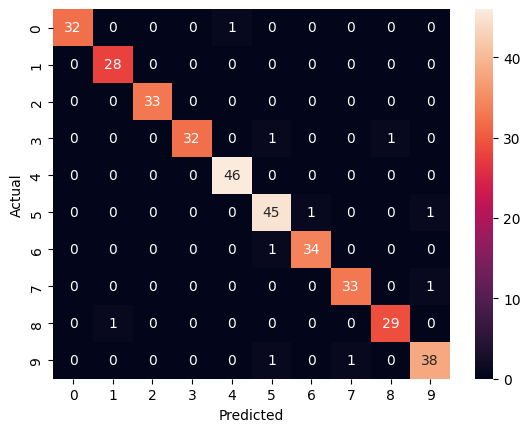

In [55]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d',
             xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 다중분류에서도 혼동행렬 사용 가능


- 정밀도 (Precision)
    - 양성이라고 예측한 것(TP+FP)중에 실제 양성(TP)일 확률
    - 정밀도가 중요한 지표인 경우 : 음성인 데이터를 양성으로 예측하면 안되는 경우(스펨메일 분류 등)
    - 그외.. 컨텐츠 필터링(유해한 컨텐츠)

In [56]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [63]:
# 혼동행렬 생성, Titanic 데이터 예측 결과
matrix = confusion_matrix(y_test, pred_test)
matrix
#                                   predicted
# array([[112,  22],      Actual   [[TN, FP],
#        [ 26,  63]])               [FN, TP]]

array([[115,  24],
       [ 25,  59]])

In [64]:
# Precision 확인해보기기
# TN, TP, FN, FP = matrix.flatten()
TN, TP, FN, FP = 112, 63, 26, 22
Precision = TP / (TP + FP)
Precision, precision_score(y_test, pred_test)

(0.7411764705882353, 0.7108433734939759)

- 재현율 (Recall)
    - 실제 양성 (TP + FN) 중에 양성으로 예측한(TP) 확률
    - 재현율이 중요한 경우: 양성인 데이터를 음성으로 예측하면 안되는 경우 (암진단, 보험/금융 사기 등)
    - 실제 암인데 암이 아니라고 하면 안됨

In [65]:
Recall = TP / (TP + FN)
Recall, recall_score(y_test, pred_test)

(0.7078651685393258, 0.7023809523809523)

### 좋은 모델이란?
- 정밀도와 재현율의 조화를 이루는 모델
- 정밀도와 재현율의 평균을 취하는 것이 일반적
- F1 Score
    - 정밀도와 재현율의 조화를 이루는 지표
    - 정밀도와 재현율의 평균을 취하는 것이 일반적
    - F1 Score

In [109]:
def evaluate_binary_classification(y_true, y_pred):
    print('혼동행렬:\n', confusion_matrix(y_true, y_pred))
    print(f'정확도: {accuracy_score(y_true, y_pred):.4f}, 정밀도: {precision_score(y_true, y_pred):.4f}, 재현율: {recall_score(y_true, y_pred):.4f}, F1 Score: {f1_score(y_true, y_pred):.4f}')

evaluate_binary_classification(y_test, pred_test)




혼동행렬:
 [[117  22]
 [ 23  61]]
정확도: 0.7982, 정밀도: 0.7349, 재현율: 0.7262, F1 Score: 0.7305


In [67]:
# 잘못 학습된 모델 만들어보기(2)
class MyDeathClassifer(BaseEstimator):

    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.zeros((X.shape[0], 1))

In [68]:
my_death_classifier = MyDeathClassifer()
my_death_classifier.predict(X).shape, df.shape

((891, 1), (891, 12))

In [69]:
# 1. 모델 학습
my_classifier = MyDeathClassifer()
my_classifier.fit(X_train, y_train)

# 2. 예측
pred_train = my_classifier.predict(X_train)
pred_test = my_classifier.predict(X_test)

# 3. 평가
evaluate_binary_classification(y_train, pred_train)
evaluate_binary_classification(y_test, pred_test)


혼동행렬:
 [[410   0]
 [258   0]]
정확도: 0.6138
정밀도: 0.0000
재현율: 0.0000
F1 Score: 0.0000
혼동행렬:
 [[139   0]
 [ 84   0]]
정확도: 0.6233
정밀도: 0.0000
재현율: 0.0000
F1 Score: 0.0000


c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [70]:
from sklearn.linear_model import LogisticRegression

# 1. 모델 학습
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

# 2. 예측
pred_train = lr_clf.predict(X_train)
pred_test = lr_clf.predict(X_test)

# 3. 평가
evaluate_binary_classification(y_train, pred_train)
evaluate_binary_classification(y_test, pred_test)

혼동행렬:
 [[350  60]
 [ 77 181]]
정확도: 0.7949
정밀도: 0.7510
재현율: 0.7016
F1 Score: 0.7255
혼동행렬:
 [[117  22]
 [ 23  61]]
정확도: 0.7982
정밀도: 0.7349
재현율: 0.7262
F1 Score: 0.7305


c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
- 정밀도와 재현율의 'trade-off' 관계
    - 분류 결정 임계치(threshold)를 낮추면? positive 예측 데이터가 많아짐 (e.g. 0.3 이면 0.3 이상인 데이터는 모두 positive로 예측)
        - 양성으로 예측한 데이터가 많아짐
        - **정밀도는 낮아지고, 재현율을 높아진다.**
    - 분류 결정 임계치(threshold)를 높이면? negative 예측 데이터가 많아짐 (e.g. 0.7 이면 0.7 미만인 데이터는 모두 negative로 예측)
        - 양성으로 예측한 데이터가 적어짐
        - **정밀도는 높아지고, 재현율을 낮아진다.**

LogisticRegression 은 기본적으로 0.5 임계치를 사용
Sigmoid 함수의 출력값이 0.5 이상이면 양성으로 분류
Sigmoid 함수의 출력값이 0.5 미만이면 음성으로 분류

분류결정 임계치 = threshold = 기본값 0.5
임계치 낮추기 : 정밀도 낮아짐, 재현율 높아짐
임계치 높이기 : 정밀도 높아짐, 재현율 낮아짐

임계치 0.5 일때
---------------------
|예측 |sigmoid |실제|                  TP = 2, FP = 0, TN = 3, FN = 0
|0    |0.1     |0   | TN              Precision = TP / (TP + FP) = 2 / (2 + 0) = 1
|0    |0.3     |0   | TN              Recall    = TP / (TP + FN) = 2 / (2 + 0) = 1
|0    |0.4     |0   | TN
|1    |0.5     |1   | TP
|1    |0.8     |1   | TP 

임계치 0.3 일때                        임계치를 낮추니 정밀도가 낮아짐
---------------------                 
|예측 |sigmoid |실제|                  TP = 2, FP = 0, TN = 1, FN = 2
|0    |0.1     |0   | TN              Precision = TP / (TP + FP) = 2 / (2 + 0) = 1
|0    |0.3     |1   | FN              Recall    = TP / (TP + FN) = 2 / (2 + 2) = 0.4
|0    |0.4     |1   | FN
|1    |0.5     |1   | TP
|1    |0.8     |1   | TP

정밀도와 재현율의 'trade-off' 관계 증명

${Precision} = \frac{TP}{TP + FP}$

${Recall} = \frac{TP}{TP + FN}$

In [79]:
from sklearn.preprocessing import Binarizer # data를 threshold 기준으로 이진 분류해주는 전처리 모델

temp_X = [[1, -1, 2], [2, 0, 0.8], [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.0) # threshold를 기준으로 초과하는 값은 1, 이하인 값은 0으로 변환
adj_X = binarizer.fit_transform(temp_X)
adj_X

# threshold 0.09 일때
# array([[1., 0., 1.],
#        [1., 0., 1.],
#        [0., 1., 1.]])

# threshold 0.5 일때
# array([[1., 0., 1.],
#        [1., 0., 1.],
#        [0., 1., 1.]])

# threshold 1.0 일때
# array([[0., 0., 1.],
#        [1., 0., 0.],
#        [0., 1., 1.]])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 1.]])

In [86]:
pred_proba = lr_clf.predict_proba(X_test)
print(pred_proba[:7])

pred = lr_clf.predict(X_test)
print(pred[:7])

[[0.83741741 0.16258259]
 [0.88842911 0.11157089]
 [0.92060845 0.07939155]
 [0.0559761  0.9440239 ]
 [0.29857741 0.70142259]
 [0.50640704 0.49359296]
 [0.09195634 0.90804366]]
[0 0 0 1 1 0 1]


In [96]:
pred_proba, pred_proba.shape

(array([[0.83741741, 0.16258259],
        [0.88842911, 0.11157089],
        [0.92060845, 0.07939155],
        [0.0559761 , 0.9440239 ],
        [0.29857741, 0.70142259],
        [0.50640704, 0.49359296],
        [0.09195634, 0.90804366],
        [0.07323689, 0.92676311],
        [0.40974162, 0.59025838],
        [0.28178553, 0.71821447],
        [0.906607  , 0.093393  ],
        [0.27176354, 0.72823646],
        [0.87346171, 0.12653829],
        [0.10177108, 0.89822892],
        [0.03670249, 0.96329751],
        [0.2451767 , 0.7548233 ],
        [0.85936276, 0.14063724],
        [0.75933478, 0.24066522],
        [0.90739889, 0.09260111],
        [0.6354339 , 0.3645661 ],
        [0.67598079, 0.32401921],
        [0.06166102, 0.93833898],
        [0.87346325, 0.12653675],
        [0.57368582, 0.42631418],
        [0.30730705, 0.69269295],
        [0.10106102, 0.89893898],
        [0.89703557, 0.10296443],
        [0.30780262, 0.69219738],
        [0.17800362, 0.82199638],
        [0.384

In [95]:
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
pred_proba_1, pred_proba_1.shape

(array([[0.16258259],
        [0.11157089],
        [0.07939155],
        [0.9440239 ],
        [0.70142259],
        [0.49359296],
        [0.90804366],
        [0.92676311],
        [0.59025838],
        [0.71821447],
        [0.093393  ],
        [0.72823646],
        [0.12653829],
        [0.89822892],
        [0.96329751],
        [0.7548233 ],
        [0.14063724],
        [0.24066522],
        [0.09260111],
        [0.3645661 ],
        [0.32401921],
        [0.93833898],
        [0.12653675],
        [0.42631418],
        [0.69269295],
        [0.89893898],
        [0.10296443],
        [0.69219738],
        [0.82199638],
        [0.61515884],
        [0.14490342],
        [0.64346534],
        [0.11858111],
        [0.49498619],
        [0.08382049],
        [0.59058679],
        [0.06926464],
        [0.24435557],
        [0.26728943],
        [0.1047556 ],
        [0.25335262],
        [0.18804349],
        [0.11234114],
        [0.05435915],
        [0.88741259],
        [0

In [ ]:
임계값을 올리면 positive 예측 데이터가 적어짐 → 정밀도 높아짐, 재현율 낮아짐
임계값을 낮추면 positive 예측 데이터가 많아짐 → 정밀도 낮아짐, 재현율 높아짐

In [88]:
from sklearn.preprocessing import Binarizer

# 1(생존)일 확률만 가져오고 + 배치 차원 추가
predict_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=0.5)
custom_pred = binarizer.fit_transform(predict_proba_1)
evaluate_binary_classification(y_test, custom_pred)

binarizer = Binarizer(threshold=0.6)
custom_pred = binarizer.fit_transform(predict_proba_1)
evaluate_binary_classification(y_test, custom_pred)

혼동행렬:
 [[117  22]
 [ 23  61]]
정확도: 0.7982
정밀도: 0.7349
재현율: 0.7262
F1 Score: 0.7305
혼동행렬:
 [[124  15]
 [ 30  54]]
정확도: 0.7982
정밀도: 0.7826
재현율: 0.6429
F1 Score: 0.7059


In [91]:
# 임계치 별 평가 결과 확인
threshold = [0.4, 0.45, 0.5, 0.55, 0.6]

def evaluate_by_threshold(y_true, y_pred, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        custom_pred = binarizer.fit_transform(y_pred)
        evaluate_binary_classification(y_true, custom_pred)

evaluate_by_threshold(y_test, predict_proba_1, threshold)


혼동행렬:
 [[109  30]
 [ 19  65]]
정확도: 0.7803
정밀도: 0.6842
재현율: 0.7738
F1 Score: 0.7263
혼동행렬:
 [[114  25]
 [ 19  65]]
정확도: 0.8027
정밀도: 0.7222
재현율: 0.7738
F1 Score: 0.7471
혼동행렬:
 [[117  22]
 [ 23  61]]
정확도: 0.7982
정밀도: 0.7349
재현율: 0.7262
F1 Score: 0.7305
혼동행렬:
 [[121  18]
 [ 23  61]]
정확도: 0.8161
정밀도: 0.7722
재현율: 0.7262
F1 Score: 0.7485
혼동행렬:
 [[124  15]
 [ 30  54]]
정확도: 0.7982
정밀도: 0.7826
재현율: 0.6429
F1 Score: 0.7059


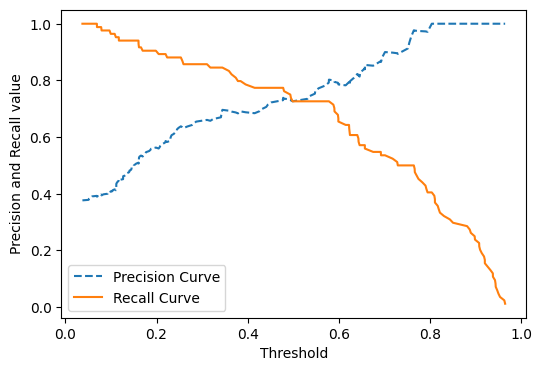

In [103]:
# 정밀도-재현율 변화 과정 시각화
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# 실제값과 양성이라고 예측한 확률을 넣어주면, threshold에 따른 precision과 recall을 반환
precision, recall, thresholds = precision_recall_curve(y_test, predict_proba_1)

# 기준 threshold 211개
# - 정밀도와 재현율에 추가된 마지막 값은 극단적 임계값 설정에 대한 계산 결과
# - 정밀도는 마지막에 1 추가 (임계값이 매우 낮아 모든 샘플이 양성으로 예측된 경우)
# - 재현율은 마지막에 0 추가 (임계값이 매우 높아 모든 샘플이 음성으로 예측된 경우)

# precision.shape, recall.shape, thresholds.shape
# ((212,), (212,), (211,))

# 정밀도-재현율 곡선 시각화
plt.figure(figsize=(6, 4))
plt.plot(thresholds, precision[:-1], linestyle='--', label='Precision Curve')
plt.plot(thresholds, recall[:-1], label='Recall Curve')
plt.xlabel('Threshold')
plt.ylabel('Precision and Recall value')
plt.legend()
plt.show()

- F1 Score
    - 정밀도와 재현율의 조화 평균
    - 정밀도와 재현율의 평균을 취하는 것이 일반적
    - F1 Score

In [105]:
from sklearn.metrics import f1_score

f1_score(y_test, pred_test)

0.7305389221556886

In [110]:
# 임계치 별 평가 결과 확인
threshold = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

def evaluate_by_threshold(y_true, y_pred, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        custom_pred = binarizer.fit_transform(y_pred)
        evaluate_binary_classification(y_true, custom_pred)

evaluate_by_threshold(y_test, predict_proba_1, threshold)

# evaluate_binary_classification(y_test, y_pred)

혼동행렬:
 [[109  30]
 [ 19  65]]
정확도: 0.7803, 정밀도: 0.6842, 재현율: 0.7738, F1 Score: 0.7263
혼동행렬:
 [[114  25]
 [ 19  65]]
정확도: 0.8027, 정밀도: 0.7222, 재현율: 0.7738, F1 Score: 0.7471
혼동행렬:
 [[117  22]
 [ 23  61]]
정확도: 0.7982, 정밀도: 0.7349, 재현율: 0.7262, F1 Score: 0.7305
혼동행렬:
 [[121  18]
 [ 23  61]]
정확도: 0.8161, 정밀도: 0.7722, 재현율: 0.7262, F1 Score: 0.7485
혼동행렬:
 [[124  15]
 [ 30  54]]
정확도: 0.7982, 정밀도: 0.7826, 재현율: 0.6429, F1 Score: 0.7059
혼동행렬:
 [[130   9]
 [ 36  48]]
정확도: 0.7982, 정밀도: 0.8421, 재현율: 0.5714, F1 Score: 0.6809
혼동행렬:
 [[134   5]
 [ 39  45]]
정확도: 0.8027, 정밀도: 0.9000, 재현율: 0.5357, F1 Score: 0.6716


##### ROC Curve - AUC
- ROC Curve (Receiver Operation Characteristic Curve, 수신자 조작 특성 커브)
    - x축: FPR (False Positive Rate), 실제 음성을 잘못 예측한 비율
        - FPR = FP / (FP + TN)
    - y축: TPR (True Positive Rate), recall score
        - TPR = TP / (FN + TP)
- AUC (Area Under Curve) : ROC 곡선 아래 면적 (1에 가까울수록 성능 좋음)

In [112]:
from sklearn.metrics import roc_curve

y_true_sample = np.array([0, 0, 1, 1])
y_pred_sample = np.array([0.1, 0.4, 0.35, 0.8])

fpr, tpr, thresholds = roc_curve(y_true_sample, y_pred_sample)
fpr, tpr, thresholds

# (array([0. , 0. , 0.5, 0.5, 1. ]), # FPR
#  array([0. , 0.5, 0.5, 1. , 1. ]), # TPR
#  array([ inf, 0.8 , 0.4 , 0.35, 0.1 ])) # threshold

(array([0. , 0. , 0.5, 0.5, 1. ]),
 array([0. , 0.5, 0.5, 1. , 1. ]),
 array([ inf, 0.8 , 0.4 , 0.35, 0.1 ]))

c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


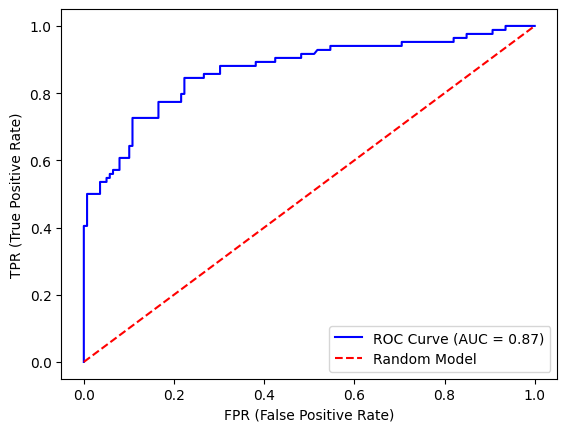

In [115]:
# AUC 평가
from sklearn.metrics import auc

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

# fpr : positive 예측을 잘못한 비율, 실제 음성을 잘못 예측한 비율
# tpr : positive 예측을 맞은 비율, 실제 양성을 맞춘 비율
# 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc(fpr, tpr) # 0.8684052757793765→ 0.5 는 랜덤 모델과 동일한 성능, 1 은 완벽한 모델

plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Model')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.legend()
plt.show()


---

### 회귀모델 평가

In [116]:
# 샘플 데이터
y_true = [3, 0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 9]

# 손실값, 오차를 줄이는 것이 목표

In [119]:
from sklearn.metrics import mean_squared_error             # MSE (평균 제곱 오차)
from sklearn.metrics import root_mean_squared_error        # RMSE (제곱 평균 제곱근 오차)
from sklearn.metrics import mean_absolute_error            # MAE (평균 절대 오차)
from sklearn.metrics import mean_squared_log_error         # MSLE (평균 제곱 로그 오차)
from sklearn.metrics import root_mean_squared_log_error    # RMSLE (제곱 평균 제곱근 로그 오차)
from sklearn.metrics import r2_score                       # R^2 결정계수

print(f'MSE  : {mean_squared_error(y_true, y_pred)}')
print(f'RMSE : {root_mean_squared_error(y_true, y_pred)}')
print(f'MAE  : {mean_absolute_error(y_true, y_pred)}')
print(f'MSLE : {mean_squared_log_error(y_true, y_pred)}')
print(f'RMSLE: {root_mean_squared_log_error(y_true, y_pred)}')
print(f'R^2  : {r2_score(y_true, y_pred)}')

MSE  : 1.125
RMSE : 1.0606601717798212
MAE  : 0.75
MSLE : 0.058006407800631835
RMSLE: 0.2408451946803835
R^2  : 0.8059299191374663


| 평가모델      | 특징                    | 의미                       | 좋은 모델 기준         |
| --------- | --------------------- | ------------------------ | ---------------- |
| **MSE**   | 오차 제곱의 평균             | 큰 오차에 더 큰 페널티            | 값이 작을수록 좋음       |
| **RMSE**  | MSE의 제곱근              | 해석을 실제 단위와 같게 함          | 값이 작을수록 좋음       |
| **MAE**   | 오차 절댓값의 평균            | 모든 오차를 동일 비중으로 반영        | 값이 작을수록 좋음       |
| **MSLE**  | 로그 변환된 예측-실제 값의 제곱 평균 | 상대적 차이를 반영, 작은 값의 오차를 중시 | 값이 작을수록 좋음       |
| **RMSLE** | MSLE의 제곱근             | 로그 기반, 실제 단위와 해석 가능      | 값이 작을수록 좋음       |
| **R²**    | 모델 설명력(분산 비율)         | 1에 가까울수록 예측력이 높음         | 값이 클수록 좋음 (최대 1) |
